W tym dokumencie zostały poruszone następujące kwestie: 
1. Krótka analiza ekploracyjna danych 
2. Preprocessing danych 
3. Podział danych na zbiór testowy i zbiór treningowy  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re # regex to detect username, url, html entity 
import nltk # to use word tokenize (split the sentence into words)
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

Podczas analizy różnych zbiorów danych zdecydowano się na użycie zbiorów danych, które nie zostały wygenerowane, a rekordy faktycznie pochodzą z twittera. 

Wczytywanie danych: 

In [2]:
data_1 = pd.read_csv("./labeled_data.csv")
data_2 = pd.read_csv("./train_E6oV3lV.csv")

Sprawdzenie braków danych: 

In [ ]:
print(data_1.isnull().sum())
print(data_2.isnull().sum())

Wybieranie wspólnych kolumn i zmiana nazwy kolumn.

In [4]:
data_1 = data_1[['tweet', 'class']]
data_2 = data_2[['tweet', 'label']]

Liczba rekordów dla danych klas (pierwszy zbiór):
class
1    19190
2     4163
0     1430
Name: count, dtype: int64

Liczba rekordów dla danych klas (drugi zbiór):
label
0    29720
1     2242
Name: count, dtype: int64


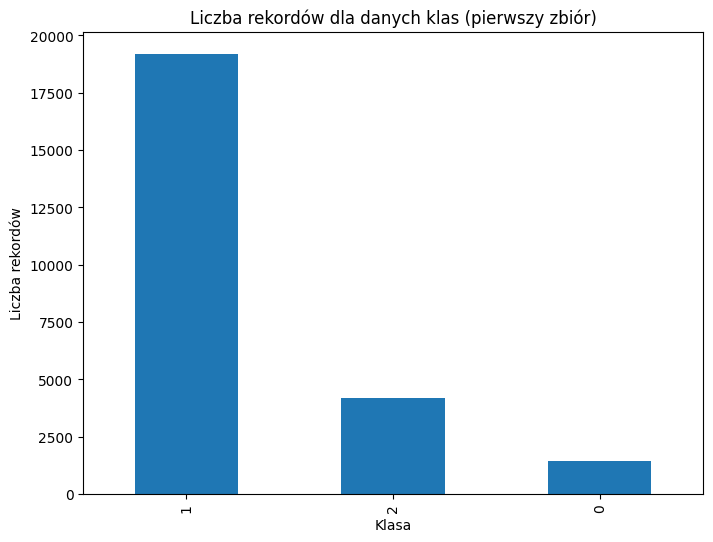

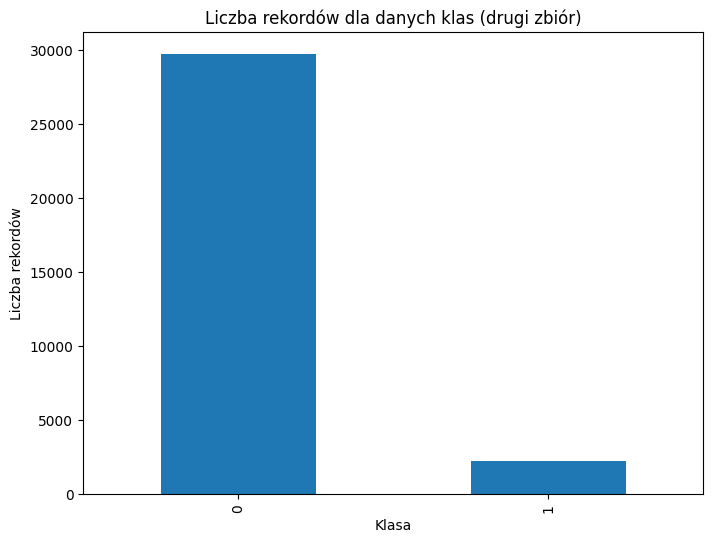

In [5]:
data_1_counts = data_1['class'].value_counts()
print("Liczba rekordów dla danych klas (pierwszy zbiór):")
print(data_1_counts)

data_2_counts = data_2['label'].value_counts()
print("\nLiczba rekordów dla danych klas (drugi zbiór):")
print(data_2_counts)

plt.figure(figsize=(8, 6))
data_1_counts.plot(kind='bar')
plt.title('Liczba rekordów dla danych klas (pierwszy zbiór)')
plt.xlabel('Klasa')
plt.ylabel('Liczba rekordów')
plt.show()

plt.figure(figsize=(8, 6))
data_2_counts.plot(kind='bar')
plt.title('Liczba rekordów dla danych klas (drugi zbiór)')
plt.xlabel('Klasa')
plt.ylabel('Liczba rekordów')
plt.show()

Zgodnie z dokumentacją dostępną na stronie:  
https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset

klasy oznaczają:
- 0 - hate speech
- 1 - offensive language 
- 2 - neighter

https://www.kaggle.com/datasets/vkrahul/twitter-hate-speech

klasy oznaczają:
- 0 - no hate speech 
- 1 - hate speech


Można zauważyć, że oddzielnie te zbiory danych nie są zbyt wiele warte, ze względu na swoje zbilansowanie, jednakże połączenie tych dwóch zbiorów danych sprawi, że będziemy mogli mówić o wiarygodnym uczeniu maszynowym. Możemy przyjąć, że offensive language będzie traktowane jako hate speech w naszym projekcie.

In [6]:
data_1['class'] = data_1['class'].replace({0: 1, 2: 0})
data_2 = data_2.rename(columns={'label': 'class'})

Połączenie obu zbiorów danych:

In [7]:
merged_data = pd.concat([data_1, data_2])

In [8]:
stop_words = set(stopwords.words('english'))
stop_words.add("rt")

def remove_entity(raw_text):
    entity_regex = r"&[^\s;]+;"
    text = re.sub(entity_regex, "", raw_text)
    return text

def change_user(raw_text):
    regex_1 = r"@([^ ]+)|@ *([^ ]+)"
    text = re.sub(regex_1, "user", raw_text)
    text = text.replace("@", '')
    return text

def remove_url(raw_text):
    url_regex = r"(?i)\b((?:https?:?//|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    text = re.sub(url_regex, '', raw_text)
    url_regex = r"htt([^ ]+)"
    text = re.sub(url_regex, '', raw_text)
    return text

def remove_noise_symbols(raw_text):
    text = raw_text.replace('"', '')
    text = text.replace("'", '')
    text = text.replace("!", '')
    text = text.replace("`", '')
    text = text.replace("..", '')
    text = text.replace("*", '')
    text = text.replace("-", '')
    text = text.replace(":", '')
    text = text.replace("_", '')
    text = text.replace("=", '')
    text = text.replace("^", '')
    text = text.replace("$", '')
    text = text.replace("|", '')
    text = text.replace("~", '')
    text = text.replace("\\", '')
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"/", " / ", text)
    return text

def remove_stopwords(raw_text):
    tokenize = nltk.word_tokenize(raw_text)
    text = [word for word in tokenize if not word.lower() in stop_words]
    text = " ".join(text)

    return text

def preprocess(datas, exclude_chars):
    clean = []
    clean = [change_user(text) for text in datas]
    clean = [remove_entity(text) for text in clean]
    clean = [remove_url(text) for text in clean]
    clean = [remove_noise_symbols(text) for text in clean]
    clean = [remove_stopwords(text) for text in clean]
    clean = [text.lower() for text in clean]
    for char in exclude_chars:
        clean = [text.replace(char, '') for text in clean]

    return clean

Został wygenerowany słownik znaków występujących w zbiorach danych, które zdecydowano się usunąć

In [9]:
exclude_chars = {'ð', '\x9f', '\x93', '±', '\x98', '\x99', '\x8e', '\x91', '\x84', '\x92', '¦', 'â', '\x80', '¯', '\xad', '\x86', '\x9d', '\x90', '\x9c', '\x88', '\x8a', '¤', 'ï', '¸', '\x8f', '\x8c', '¼', '»', '¶', '\x89', '\x82', '\x81', '\x83', '\x8d', '½', '©', '\x9b', '³', '\x96', '¥', 'ª', '\x9a', 'º', '\x95', '\x9e', 'ó', '¾', '®', '¨', 'ã', '\x8b', '\x87', '«', '\x97', '£', '\x94', '¿', '·', 'æ', '´', 'å', 'ç', 'ä', '¹', '¢', 'µ', '²', '¬', '°', 'ì', 'ë', 'à', 'ê', 'í', 'é', '§', '¡', 'è', 'î', 'ø', 'ù', '[', 'á', '×', 'ñ', 'ò'}

tweets = list(merged_data['tweet'])
labels = list(merged_data['class'])

clean_tweets = preprocess(tweets, exclude_chars)
clean_data = pd.DataFrame({'tweet': clean_tweets, 'class': labels})

In [10]:
print("Ilość rekordów przed redukcją pustych danych: ",len(clean_data))
clean_data['tweet'] = clean_data["tweet"].str.strip()
clean_data = clean_data[clean_data["tweet"] != '']
print("Ilość rekordów przed redukcją duplikatów: ",len(clean_data))
clean_data = clean_data.drop_duplicates()
print("Ilość rekordów po redukcji duplikatów: ",len(clean_data))

Ilość rekordów przed redukcją pustych danych:  56745
Ilość rekordów przed redukcją duplikatów:  56738
Ilość rekordów po redukcji duplikatów:  53645


Liczba rekordów dla danych klas (oczyszczony zbiór):
class
0    31471
1    22174
Name: count, dtype: int64


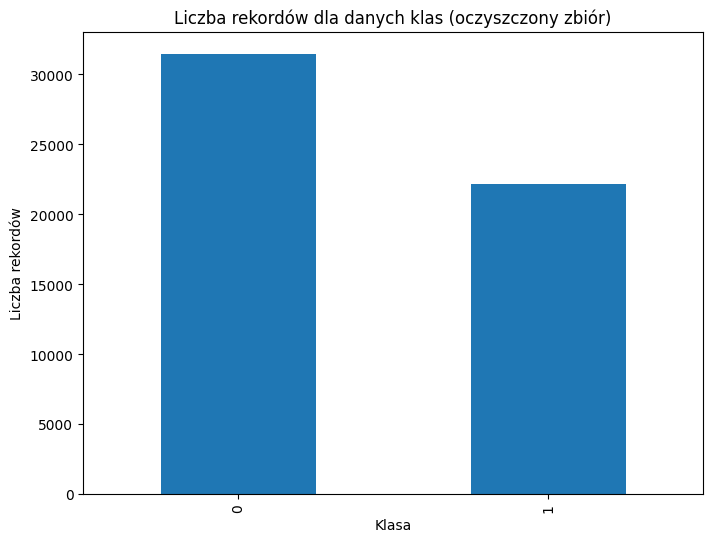

In [11]:
clean_data_counts = clean_data['class'].value_counts()
print("Liczba rekordów dla danych klas (oczyszczony zbiór):")
print(clean_data_counts)

plt.figure(figsize=(8, 6))
clean_data_counts.plot(kind='bar')
plt.title('Liczba rekordów dla danych klas (oczyszczony zbiór)')
plt.xlabel('Klasa')
plt.ylabel('Liczba rekordów')
plt.show()


Długość najdłuższego tweeta: 155


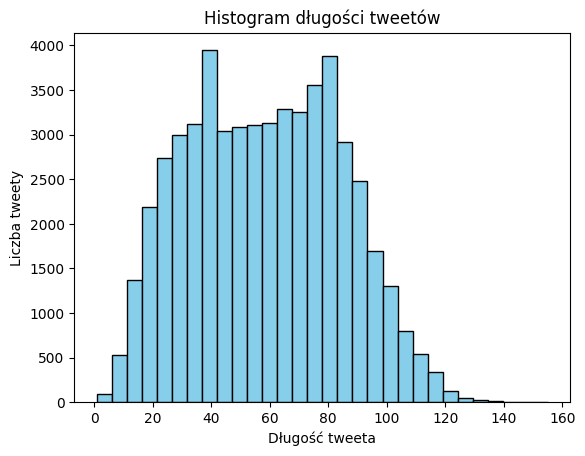

In [12]:
clean_data['tweet_length'] = clean_data['tweet'].apply(lambda x: len(x))
max_tweet_length = clean_data['tweet_length'].max()
print("Długość najdłuższego tweeta:", max_tweet_length)

plt.hist(clean_data['tweet_length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Długość tweeta')
plt.ylabel('Liczba tweety')
plt.title('Histogram długości tweetów')
plt.show()

Można zauważyć, że zbiory są nadal niedostatecznie zbilansowane. Dlatego zdecydowano się na undersampling klasy 0, biorąc pod uwagę długość tweeta.

In [13]:
sorted_clean_data = clean_data.sort_values(by=['class', 'tweet_length'])

class_0 = sorted_clean_data[(sorted_clean_data['class'] == 0)].head(len(clean_data[clean_data['class'] == 1]))
class_1 = sorted_clean_data[sorted_clean_data['class'] == 1]

balanced_clean_data = pd.concat([class_0, class_1])

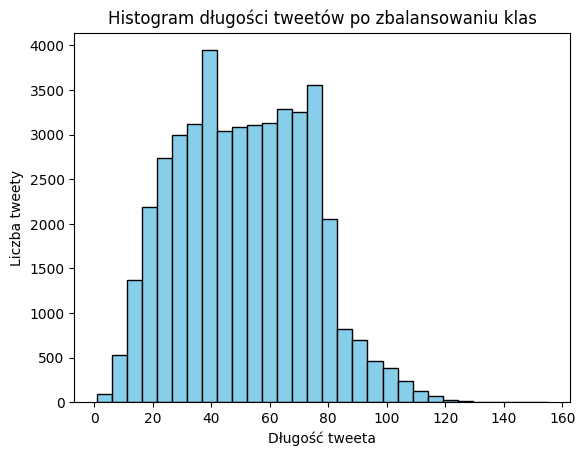

In [14]:
plt.hist(balanced_clean_data['tweet_length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Długość tweeta')
plt.ylabel('Liczba tweety')
plt.title('Histogram długości tweetów po zbalansowaniu klas')
plt.show()

Liczba rekordów dla danych klas (oczyszczony zbilansowany zbiór):
class
0    22174
1    22174
Name: count, dtype: int64


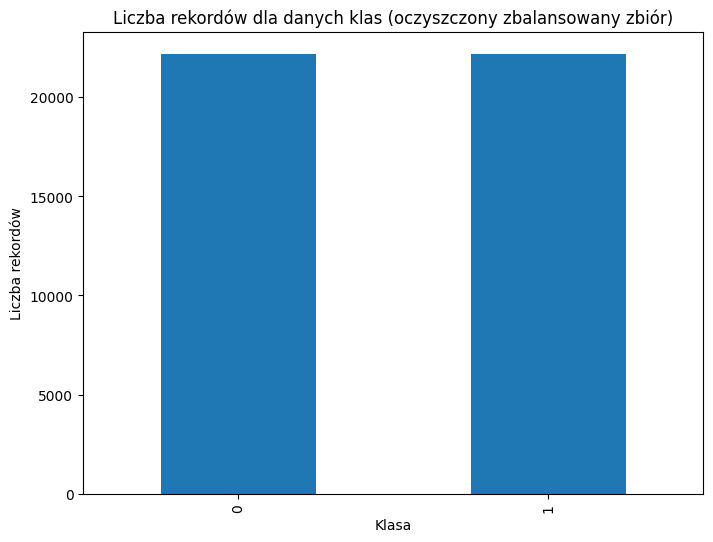

In [15]:
balanced_clean_data_counts = balanced_clean_data['class'].value_counts()
print("Liczba rekordów dla danych klas (oczyszczony zbilansowany zbiór):")
print(balanced_clean_data_counts)

plt.figure(figsize=(8, 6))
balanced_clean_data_counts.plot(kind='bar')
plt.title('Liczba rekordów dla danych klas (oczyszczony zbalansowany zbiór)')
plt.xlabel('Klasa')
plt.ylabel('Liczba rekordów')
plt.show()

Zapisanie zbioru danych przed podziałem do pliku CSV

In [16]:
balanced_clean_data = balanced_clean_data.drop(columns=['tweet_length'])
balanced_clean_data.to_csv("dataset_before_split.csv", index=False)

Wykonajmy podział danych i zapiszmy je do plików.

In [17]:
X = balanced_clean_data.drop(columns=['class'])
y = balanced_clean_data['class'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [18]:
train_data = pd.concat([X_train, y_train], axis=1)  
train_data.to_csv('train_data.csv', index=False)  

test_data = pd.concat([X_test, y_test], axis=1) 
test_data.to_csv('test_data.csv', index=False)  